In [1]:
import pandas as pd

good_data = pd.read_csv("good_data.csv", header=None)
shuffled_data = pd.read_csv("bad_data_shuffle.csv", header=None)

good_data.head()

,0,1,2,3,4,5,6,7,8,9,...,790,791,792,793,794,795,796,797,798,799
0,0,0,0,1,1,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
1,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
3,0,1,0,0,0,0,0,1,0,1,...,0,0,0,0,1,0,1,0,0,0
4,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [2]:
good_data_marked = good_data.assign(correct=lambda _: 1)
shuffled_data_marked = shuffled_data.assign(correct=lambda _: 0)
joined_data = good_data_marked.append(shuffled_data_marked)

In [3]:
joined_data

,0,1,2,3,4,5,6,7,8,9,...,791,792,793,794,795,796,797,798,799,correct
0,0,0,0,1,1,0,0,0,0,0,...,1,0,0,0,1,1,0,0,0,1
1,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
2,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
3,0,1,0,0,0,0,0,1,0,1,...,0,0,0,1,0,1,0,0,0,1
4,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45128,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
45129,0,0,0,1,0,1,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
45130,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
45131,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,1,1,0,0,0,0


In [4]:
joined_data = joined_data.sample(frac=1).reset_index(drop=True) #shuffle data in place
joined_data

,0,1,2,3,4,5,6,7,8,9,...,791,792,793,794,795,796,797,798,799,correct
0,0,0,1,0,0,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
1,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,0,0,1,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,1,0,0
3,0,0,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
4,0,1,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90261,1,0,0,0,0,1,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
90262,0,0,0,1,0,1,0,0,1,0,...,1,0,0,0,1,0,0,0,1,1
90263,0,0,1,0,0,1,0,0,1,0,...,0,0,0,1,0,0,1,0,0,1
90264,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [5]:
Y = joined_data.pop('correct')

In [2]:
import numpy as np

In [7]:
joined_data_final = np.array([
    np.array(np.array_split(row, 40)) for index, row in joined_data.iterrows()
])

joined_data_final.shape



(90266, 40, 20)

In [8]:
import pickle
output = open('data.pkl', 'wb')
pickle.dump(joined_data_final, output)
output.close()

output = open('y.pkl', 'wb')
pickle.dump(Y, output)
output.close()

In [9]:
# loading
"""
pkl_file = open('data.pkl', 'rb')
joined_data_final = pickle.load(pkl_file)
pkl_file.close()

pkl_file = open('y.pkl', 'rb')
y = pickle.load(pkl_file)
pkl_file.close()

"""

"\npkl_file = open('data.pkl', 'rb')\n\ndata1 = pickle.load(pkl_file)\n"

In [10]:
joined_data_final.shape, Y.shape

((90266, 40, 20), (90266,))

In [11]:
X_test = joined_data_final[:18053]
X_valid = joined_data_final[18053:(18053*2)]
X_train = joined_data_final[(18053*2):]
len(X_train), X_train[0]

(54160,
 array([[0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0],
        [1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
        [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0],
        [0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
        [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0],
        [0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
        [0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
        [0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1],
        [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
        [1, 

In [12]:
Y_test = Y[:18053]
Y_valid = Y[18053:(18053*2)]
Y_train = Y[(18053*2):]
Y_train

36106    0
36107    0
36108    0
36109    1
36110    0
        ..
90261    0
90262    1
90263    1
90264    0
90265    0
Name: correct, Length: 54160, dtype: int64

In [13]:
import tensorflow as tf
from tensorflow import keras

In [14]:
model = keras.models.Sequential()
model.add(keras.layers.Conv1D(filters=60, kernel_size=3, activation='relu', input_shape=(40, 20)))
model.add(keras.layers.Conv1D(filters=60, kernel_size=3, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.MaxPooling1D(pool_size=2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(400, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(1, activation="sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 38, 60)            3660      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 36, 60)            10860     
_________________________________________________________________
dropout (Dropout)            (None, 36, 60)            0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 18, 60)            0         
_________________________________________________________________
flatten (Flatten)            (None, 1080)              0         
_________________________________________________________________
dense (Dense)                (None, 400)               432400    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               4

In [15]:
model.compile(
    loss="binary_crossentropy",
    optimizer="RMSprop",
    metrics=["binary_accuracy"])

In [16]:
es = keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=2,
                              verbose=0, mode='auto')
history = model.fit(X_train, Y_train, epochs=25, validation_data=(X_valid, Y_valid), callbacks=[es])

Train on 54160 samples, validate on 18053 samples
Epoch 1/25
54160/54160 [==============================] - 29s 539us/sample - loss: 0.4418 - binary_accuracy: 0.7743 - val_loss: 0.2801 - val_binary_accuracy: 0.8815
Epoch 2/25
54160/54160 [==============================] - 17s 308us/sample - loss: 0.2279 - binary_accuracy: 0.9104 - val_loss: 0.2680 - val_binary_accuracy: 0.9026
Epoch 3/25
54160/54160 [==============================] - 17s 306us/sample - loss: 0.1825 - binary_accuracy: 0.9302 - val_loss: 0.1481 - val_binary_accuracy: 0.9431
Epoch 4/25
54160/54160 [==============================] - 17s 310us/sample - loss: 0.1624 - binary_accuracy: 0.9383 - val_loss: 0.1381 - val_binary_accuracy: 0.9452
Epoch 5/25
54160/54160 [==============================] - 17s 307us/sample - loss: 0.1528 - binary_accuracy: 0.9428 - val_loss: 0.1563 - val_binary_accuracy: 0.9441
Epoch 6/25
54160/54160 [==============================] - 17s 306us/sample - loss: 0.1482 - binary_accuracy: 0.9456 - val_los

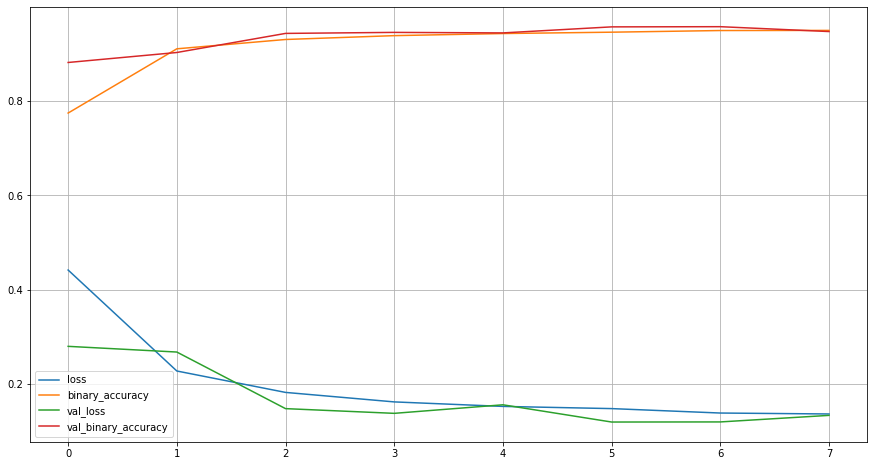

In [17]:
plt = pd.DataFrame(history.history).plot(figsize=(15, 8))
plt.grid(True)

In [18]:
model.evaluate(X_test, Y_test)

18053/18053 [==============================] - 2s 100us/sample - loss: 0.1323 - binary_accuracy: 0.9442


[0.13231241675877395, 0.94421977]

In [19]:
y_proba = model.predict(X_test[:3])
y_proba.round(2), Y_test[:3]

(array([[1.  ],
        [0.  ],
        [0.05]], dtype=float32),
 0    1
 1    0
 2    0
 Name: correct, dtype: int64)